## Predict Health Outcomes of Horses Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### READING THE DATADSET 

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('train.csv')
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [5]:
s=df.isna().sum()
s[s>0]

temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
rectal_exam_feces        190
abdomen                  213
abdomo_appearance         48
dtype: int64

In [6]:
df.nunique()

id                       1235
surgery                     2
age                         2
hospital_number           255
rectal_temp                43
pulse                      50
respiratory_rate           37
temp_of_extremities         4
peripheral_pulse            4
mucous_membrane             6
capillary_refill_time       3
pain                        6
peristalsis                 5
abdominal_distention        4
nasogastric_tube            3
nasogastric_reflux          4
nasogastric_reflux_ph      26
rectal_exam_feces           5
abdomen                     5
packed_cell_volume         49
total_protein              83
abdomo_appearance           3
abdomo_protein             54
surgical_lesion             2
lesion_1                   57
lesion_2                    4
lesion_3                    2
cp_data                     2
outcome                     3
dtype: int64

### SEPERATE X AND Y FEATURE

In [7]:
X = df.drop(columns=['id','outcome'])
Y = df[['outcome']]

In [8]:
X.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes


In [9]:
Y.head()

,outcome
0,died
1,euthanized
2,lived
3,lived
4,lived


### GIVING A LABELS TO TARGETD VALUES BY LABEL ENCODER

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
Y['outcome'] =le.fit_transform(Y['outcome'])
Y

,outcome
0,0
1,1
2,2
3,2
4,2
...,...
1230,2
1231,0
1232,2
1233,2


### SEPEARTE CATEGORICAL AND CONTINOUS FEATURE

In [12]:
cat= list(X.columns[X.dtypes=='object'])
con= list(X.columns[X.dtypes!='object'])

In [13]:
cat

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data']

In [14]:
con

['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

### CREATING SIMPLE PIPELINE
1. ORDINAL ENCODER

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OrdinalEncoder())])
pre1= ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [17]:
X_pre= pre1.fit_transform(X)

In [18]:
colls= pre1.get_feature_names_out()

In [19]:
X_pre= pd.DataFrame(X_pre,columns=colls)

### CHECKING MUTUAL INFO SCORES

In [20]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre,Y)
mi

array([0.2101849 , 0.02689984, 0.170866  , 0.08141743, 0.12901275,
       0.1511323 , 0.14821235, 0.16231751, 0.18031801, 0.        ,
       0.01619328, 0.05340767, 0.04524715, 0.0326445 , 0.06016812,
       0.03177348, 0.04343928, 0.16499805, 0.07245061, 0.05070252,
       0.        , 0.        , 0.        , 0.03737557, 0.06479095,
       0.05204907, 0.01954752])

In [21]:
mi = pd.Series(mi)
mi.index=colls

In [22]:
mi= mi.sort_values(ascending=False)
mi

num__hospital_number          0.210185
num__lesion_1                 0.180318
num__pulse                    0.170866
cat__pain                     0.164998
num__abdomo_protein           0.162318
num__packed_cell_volume       0.151132
num__total_protein            0.148212
num__nasogastric_reflux_ph    0.129013
num__respiratory_rate         0.081417
cat__peristalsis              0.072451
cat__abdomo_appearance        0.064791
cat__peripheral_pulse         0.060168
cat__surgery                  0.053408
cat__surgical_lesion          0.052049
cat__abdominal_distention     0.050703
cat__age                      0.045247
cat__capillary_refill_time    0.043439
cat__abdomen                  0.037376
cat__temp_of_extremities      0.032644
cat__mucous_membrane          0.031773
num__rectal_temp              0.026900
cat__cp_data                  0.019548
num__lesion_3                 0.016193
cat__nasogastric_tube         0.000000
cat__nasogastric_reflux       0.000000
cat__rectal_exam_feces   

<Axes: title={'center': 'Mutual Info Score'}>

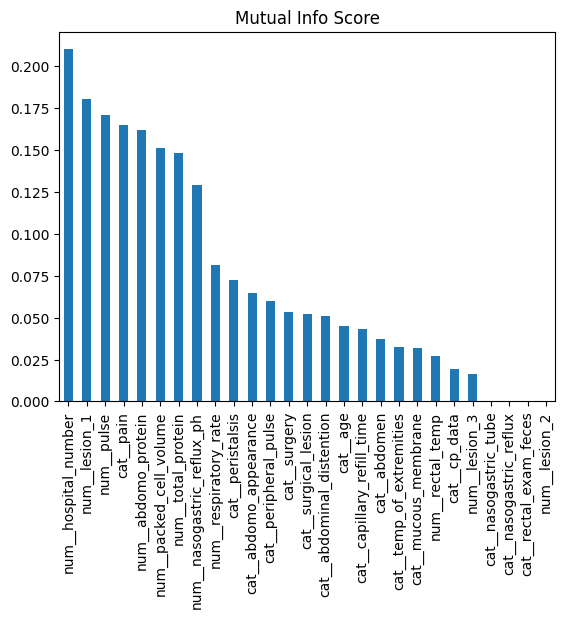

In [23]:
mi.plot(kind='bar',title='Mutual Info Score')

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
sel= SelectKBest(mutual_info_classif,k=8)
sel_feat = sel.fit_transform(X_pre,Y)

In [26]:
sel_cols= sel.get_feature_names_out()
sel_cols

array(['num__hospital_number', 'num__pulse', 'num__nasogastric_reflux_ph',
       'num__packed_cell_volume', 'num__total_protein',
       'num__abdomo_protein', 'num__lesion_1', 'cat__pain'], dtype=object)

In [27]:
imp_cols= []
for i in sel_cols:
    s= i.split('__')[1]
    imp_cols.append(s)

In [28]:
imp_cols

['hospital_number',
 'pulse',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'pain']

In [29]:
X_sel=X[imp_cols]

In [30]:
X_cat= list(X_sel.columns[X_sel.dtypes=='object'])
X_con= list(X_sel.columns[X_sel.dtypes!='object'])

### FINAL PIPELINE --> ONEHOTENCODER

In [31]:
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre2= ColumnTransformer([('num',num_pipe1,X_con),
                         ('cat',cat_pipe1,X_cat)])

In [32]:
X_pre2=pre2.fit_transform(X_sel)
X_pre2

array([[-0.31308639,  1.80177271,  1.09337973, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31025792,  0.28958155, -1.23031352, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31322579,  1.38935694, -0.4557491 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.31331946,  0.15210962, -0.71393724, ...,  1.        ,
         0.        ,  0.        ],
       [-0.30955873, -0.32904211, -1.23031352, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31415804, -0.87892981, -0.71393724, ...,  1.        ,
         0.        ,  0.        ]])

In [33]:
cols3= pre2.get_feature_names_out()

In [34]:
X_pre2=pd.DataFrame(X_pre2,columns=cols3)
X_pre2

,num__hospital_number,num__pulse,num__nasogastric_reflux_ph,num__packed_cell_volume,num__total_protein,num__abdomo_protein,num__lesion_1,cat__pain_alert,cat__pain_depressed,cat__pain_extreme_pain,cat__pain_mild_pain,cat__pain_severe_pain,cat__pain_slight
0,-0.313086,1.801773,1.093380,0.702421,-0.483319,0.068659,-0.298737,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.310258,0.289582,-1.230314,-1.576449,1.598010,-0.812647,-0.298921,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.313226,1.389357,-0.455749,-1.196638,-0.562072,0.068659,0.237648,0.0,0.0,1.0,0.0,0.0,0.0
3,3.177363,-0.260306,-1.230314,0.322609,-0.539571,0.383411,-0.298921,0.0,0.0,0.0,1.0,0.0,0.0
4,3.204717,-0.947666,1.351568,-0.247108,-0.528321,-0.434944,-0.705212,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,-0.309218,1.698669,-1.230314,0.702421,1.673013,-0.812647,-0.299289,0.0,1.0,0.0,0.0,0.0,0.0
1231,-0.314142,-0.672722,-0.713937,-1.386544,-0.562072,0.194560,-0.298737,0.0,0.0,0.0,1.0,0.0,0.0
1232,-0.313319,0.152110,-0.713937,-0.911779,-0.580823,2.334874,-0.631608,0.0,0.0,0.0,1.0,0.0,0.0
1233,-0.309559,-0.329042,-1.230314,0.797374,1.973025,-0.812647,-0.298737,0.0,0.0,0.0,1.0,0.0,0.0


### TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre2,Y,test_size=0.2,random_state=21)


In [37]:
xtrain.shape

(988, 13)

In [38]:
xtest.shape

(247, 13)

### MODEL FINDING

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [40]:
dct={'logistic':LogisticRegression(),
     'Decision tree': DecisionTreeClassifier(),
     'Random forest': RandomForestClassifier(),
     'Gradient boosting':GradientBoostingClassifier()}

In [41]:
dct.items()

dict_items([('logistic', LogisticRegression()), ('Decision tree', DecisionTreeClassifier()), ('Random forest', RandomForestClassifier()), ('Gradient boosting', GradientBoostingClassifier())])

### EVALUATE THE MODEL

In [42]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr=[]
ts=[]


In [43]:
for name,model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    f1_tr=f1_score(ytrain,ypred_tr,average='micro')
    f1_ts=f1_score(ytest,ypred_ts,average='micro')
    tr.append(f1_tr)
    ts.append(f1_ts)
   

    print('\n--------------------------------------------------------------------------\n')
    print(f'MODEL NAME : {name}')
    print(f'TRAINING F1 SCORE : {f1_tr:.4f}')
    print(f'TESTING F1 SCORE : {f1_ts:.4f}')
   


--------------------------------------------------------------------------

MODEL NAME : logistic
TRAINING F1 SCORE : 0.6771
TESTING F1 SCORE : 0.6397

--------------------------------------------------------------------------

MODEL NAME : Decision tree
TRAINING F1 SCORE : 0.9990
TESTING F1 SCORE : 0.5789



--------------------------------------------------------------------------

MODEL NAME : Random forest
TRAINING F1 SCORE : 0.9990
TESTING F1 SCORE : 0.6721

--------------------------------------------------------------------------

MODEL NAME : Gradient boosting
TRAINING F1 SCORE : 0.8725
TESTING F1 SCORE : 0.7206


### SELECTING GRADIENT BOOSTING ALGORITHM

#### HYPERPARAMETER TUNNING

In [44]:
params={'learning_rate':[0.03399],
        'n_estimators':[100],
        'max_depth':[5],
        'min_samples_split':[6]}

In [45]:
from sklearn.model_selection import RandomizedSearchCV
gbc= GradientBoostingClassifier(random_state=10)

In [46]:
rscv = RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
                   param_distributions={'learning_rate': [0.03399],
                                        'max_depth': [5],
                                        'min_samples_split': [6],
                                        'n_estimators': [100]},
                   scoring='f1_macro')

In [47]:
rscv.best_params_


{'n_estimators': 100,
 'min_samples_split': 6,
 'max_depth': 5,
 'learning_rate': 0.03399}

In [48]:

best_gbc = rscv.best_estimator_
best_gbc


GradientBoostingClassifier(learning_rate=0.03399, max_depth=5,
                           min_samples_split=6, random_state=10)

In [49]:
best_gbc.score(xtrain,ytrain)

0.9089068825910931

In [50]:
best_gbc.score(xtest,ytest)

0.7246963562753036

### SELECTING MODEL

In [51]:
ypred_tr= best_gbc.predict(xtrain)
ypred_ts= best_gbc.predict(xtest)

### PREDICTIONS

In [52]:
ypred_tr[0:5]

array([2, 2, 2, 2, 0])

In [53]:
ytrain.head()

,outcome
360,2
398,2
416,2
174,2
123,0


In [54]:
ypred_ts[0:5]

array([2, 2, 0, 0, 0])

In [55]:
ytest.head()

,outcome
793,2
746,1
213,0
880,2
622,0


### INVERS LABELLING BY INVERSE TRANFORM ON Y FEATURE

In [56]:
ypred_tr_lb= le.inverse_transform(ypred_tr)
ypred_ts_lb= le.inverse_transform(ypred_ts)

### CONFUSION MATRIX

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

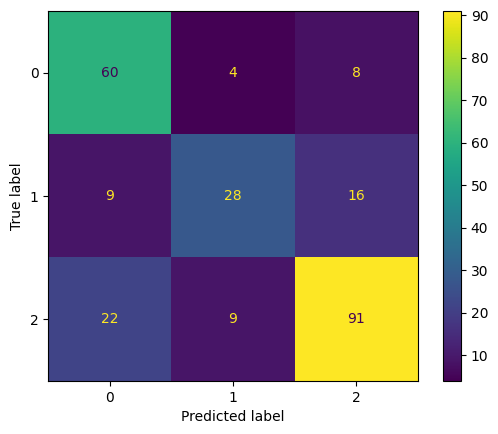

In [58]:
cf= confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()

### CLASSIFICATION REPORT

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74        72
           1       0.68      0.53      0.60        53
           2       0.79      0.75      0.77       122

    accuracy                           0.72       247
   macro avg       0.71      0.70      0.70       247
weighted avg       0.73      0.72      0.72       247



### Predicting the data

In [61]:
xnew= pd.read_csv('test.csv')
xnew.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [62]:
xnew_pre= pre2.transform(xnew)
xnew_pre

array([[-0.31009787, -1.36008154,  1.35156787, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31421631,  1.11441309, -0.4557491 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.31443093, -0.46651404, -0.71393724, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.31335265,  1.80177271,  1.09337973, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.19553506, -0.87892981,  1.35156787, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31422221, -0.46651404, -1.23031352, ...,  1.        ,
         0.        ,  0.        ]])

In [63]:
pred= best_gbc.predict(xnew_pre)
pred[0:5]

array([2, 0, 2, 1, 2])

In [64]:
pred=le.inverse_transform(pred)

In [86]:
prob= best_gbc.predict_proba(xnew_pre)[:,1]
prob[0:5]

array([0.09496524, 0.16093042, 0.03712062, 0.87772213, 0.08126722])

In [87]:
df_results=xnew[['id']]

In [88]:
df_results['outcome']=pred
df_results['probability']=prob

In [89]:
df_results

,id,outcome,probability
0,1235,lived,0.094965
1,1236,died,0.160930
2,1237,lived,0.037121
3,1238,euthanized,0.877722
4,1239,lived,0.081267
...,...,...,...
819,2054,died,0.227440
820,2055,euthanized,0.555273
821,2056,died,0.058492
822,2057,lived,0.075116


In [69]:
df_results.to_csv('submission_file.csv',index=False)